In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd ./gdrive/MyDrive/DOD\ Dataset

/content/gdrive/MyDrive/DOD Dataset


In [ ]:
!pip install transformers
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=67a122a2a1254d7598cc5acb6fdb2578ac9da06f0e167ba9fc3a93e924764de0
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from torch.utils.data import Dataset, random_split
from pathlib import Path
from pandas import read_csv, concat
import numpy as np



class ClusterDataset(Dataset):
    def __init__(self, data_dir: str):
        data_dir = Path(data_dir)

        type_df = read_csv(data_dir / "cluster_dataset.csv")
        self.len = len(type_df)
        self.examples = type_df
        labels = [x.label for x in self.examples.iloc]
        labels = set(labels)
        labels = list(labels)
        print("These are the labels: ", labels)
        self.m = {}
        for i, l in enumerate(labels):
            self.m[l] = i


    def __getitem__(self, i):

        label = self.examples.iloc[i].label
        label = self.m[label]

        return {
            "text": self.examples.iloc[i].text,
            "label": label,
        }

    def __len__(self):
        return len(self.examples)

In [ ]:
dataset = ClusterDataset('./')

These are the labels:  ['Anticipate', 'Authorities', 'Prepare', 'National/Federal', 'Organize', 'Enable']


In [ ]:
len(dataset)

7698

In [ ]:
dataset[5000]

{'text': '  Each Federal Government department and agency shall ensure the assured sharing of information by implementing the following measures:  TechnologyIdentify and use, to the maximum extent applicable, Federal or industry best-practice AIS standards, technologies, and business processes that maximize the effectiveness of AIS. Use these applicable best practices to make NSS information available, as authorized, at all classification levels and across all infrastructures, whether virtual and/or under the direct control of the agency of origination that is providing and transferring the data.',
 'label': 5}

In [ ]:
plt.savefig('cluster.png')

NameError: ignored

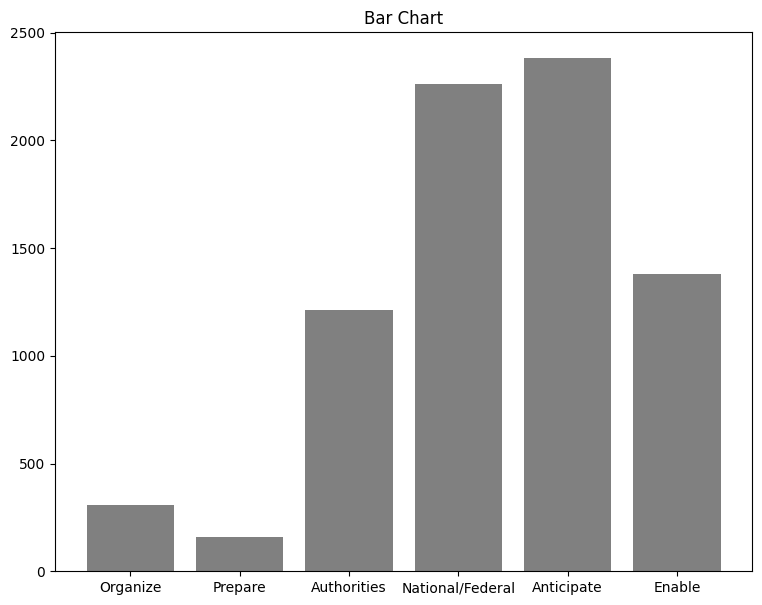

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [len(organize), len(prepare), len(authorities), len(national_federal), len(anticipate), len(enable)]
x_labels = ['Organize', 'Prepare', 'Authorities', 'National/Federal', 'Anticipate', 'Enable']

fig, ax = plt.subplots(figsize=(9, 7))
# fig, ax = plt.subplots()
ax.bar(x_labels, data, color='gray')

ax.set_title('Bar Chart')
# ax.set_xlabel('X Axis Label')
# ax.set_ylabel('Y Axis Label')

plt.show()

In [ ]:
organize = [x for x in dataset if x['label'] == 0]
prepare = [x for x in dataset if x['label'] == 1]
authorities = [x for x in dataset if x['label'] == 2]
national_federal = [x for x in dataset if x['label'] == 3]
anticipate = [x for x in dataset if x['label'] == 4]
enable = [x for x in dataset if x['label'] == 5]

In [ ]:
print(len(organize), len(prepare), len(authorities), len(national_federal), len(anticipate), len(enable))

2261 159 306 1379 1211 2382


In [ ]:
m_datasets = {}
m_datasets[0] = organize
m_datasets[1] = prepare
m_datasets[2] = authorities
m_datasets[3] = national_federal
m_datasets[4] = anticipate
m_datasets[5] = enable

In [ ]:
import random

train_dataset = []
val_dataset = []
test_dataset = []


def getRandomFromData(data, percent):
    size = int((percent * len(data)) / 100)

    output = []
    for i in range(size):
        element = random.choice(data)
        output.append(element)
        data.remove(element)

    return output, data

num_types = len(m_datasets.keys())

for i in range(num_types):
    dat = m_datasets[i]
    train_d, dat = getRandomFromData(dat, 60)
    val_d, dat = getRandomFromData(dat, 15)
    test_d, dat = getRandomFromData(dat, 25)

    train_dataset += train_d
    val_dataset += val_d
    test_dataset += test_d

In [ ]:
print(len(train_dataset), len(val_dataset), len(test_dataset))

4616 458 653


In [ ]:
organize = [x for x in test_dataset if x['label'] == 0]
prepare = [x for x in test_dataset if x['label'] == 1]
authorities = [x for x in test_dataset if x['label'] == 2]
national_federal = [x for x in test_dataset if x['label'] == 3]
anticipate = [x for x in test_dataset if x['label'] == 4]
enable = [x for x in test_dataset if x['label'] == 5]

In [ ]:
print(len(organize), len(prepare), len(authorities), len(national_federal), len(anticipate), len(enable))

192 13 26 117 103 202


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.0 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset, Dataset, DatasetDict

# mydataset = Dataset.from_generator(dataset)

myTraindataset = Dataset.from_list(train_dataset)
myValdataset = Dataset.from_list(val_dataset)
myTestdataset = Dataset.from_list(test_dataset)


mydataset = DatasetDict({"train": myTraindataset, "validation": myValdataset, "test":myTestdataset})

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding

#raw_datasets = load_dataset("glue", "mrpc")

# facebook/bart-base
#"bert-base-uncased"


checkpoint = "mukund/privbert"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


def tokenize_function(example):
    return tokenizer(example["text"], truncation=True)


tokenized_datasets = mydataset.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--mukund--privbert/snapshots/48228b4661fa8252bdb39ca44a4d9758f6b37f88/config.json
Model config RobertaConfig {
  "_name_or_path": "mukund/privbert",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}



loading file vocab.json from cache at /root/.cache/huggingface/hub/models--mukund--privbert/snapshots/48228b4661fa8252bdb39ca44a4d9758f6b37f88/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--mukund--privbert/snapshots/48228b4661fa8252bdb39ca44a4d9758f6b37f88/merges.txt
loading file tokenizer.json from cache at None
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--mukund--privbert/snapshots/48228b4661fa8252bdb39ca44a4d9758f6b37f88/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--mukund--privbert/snapshots/48228b4661fa8252bdb39ca44a4d9758f6b37f88/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--mukund--privbert/snapshots/48228b4661fa8252bdb39ca44a4d9758f6b37f88/config.json
Model config RobertaConfig {
  "_name_or_path": "mukund/privbert",
  

Map:   0%|          | 0/4616 [00:00<?, ? examples/s]

Map:   0%|          | 0/458 [00:00<?, ? examples/s]

Map:   0%|          | 0/653 [00:00<?, ? examples/s]

In [ ]:
mydataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 4616
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 458
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 653
    })
})

In [ ]:
mydataset['train'][0]

{'text': '  System Analysis  As part of the data collection effort, the first responder must determine what has been done to an IS and by whom. This includes not just the attacker, but system and network administrators and IS users. The first responder should have an initial set of questions to ask to those involved and a log book for recording all the information gathered. First responders must document everything they can, including all actions they or anyone else involved take during the investigation or response. A new log must be created for every incident or case. During data collection, the first responder will document the following in the log book:Expected IS changes or effects (e.g., changed media access control times for specific files) as first responder tools are executed.',
 'label': 0}

In [ ]:
from transformers import TrainingArguments, Trainer, logging

# training_args = TrainingArguments("test-trainer")

default_args = {
    "output_dir": "./",
    "evaluation_strategy": "epoch",
    "num_train_epochs": 6,
    # "log_level": "error",
    "logging_steps": 1,
    "log_level" : "info",
    "report_to": "none",
}

training_args = TrainingArguments(per_device_train_batch_size=64,
                                  # gradient_accumulation_steps=32,
                                  gradient_checkpointing=True,
                                  # optim="adafactor",
                                  **default_args,
                                )

PyTorch: setting up devices


In [ ]:
training_args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1,
gradient_checkpointing=True,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=every_save,
hub_token=<HUB_TOKEN>,
igno

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=len(m_datasets.keys()))

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--mukund--privbert/snapshots/48228b4661fa8252bdb39ca44a4d9758f6b37f88/config.json
Model config RobertaConfig {
  "_name_or_path": "mukund/privbert",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--mukund--privbert/snapshots/48228b4661fa8252bdb39ca44a4d9758f6b37f88/pytorch_model.bin
Some weights of the model checkpoint at mukund/privbert were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequence

In [ ]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datasets import load_metric
from sklearn.metrics import mean_squared_error
import evaluate
import numpy as np


accuracy = evaluate.load("accuracy")

# imdb = load_dataset("imdb")

f1 = evaluate.load("f1")

# imdb = load_dataset("imdb")


#F1
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    microF1 = f1.compute(predictions=predictions, references=labels, average='micro')
    macroF1 = f1.compute(predictions=predictions, references=labels, average='macro')
    weightF1 = f1.compute(predictions=predictions, references=labels, average='weighted')

    return {"micro-F1": microF1, "macroF1": macroF1, "weightF1": weightF1}


# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import Trainer, TrainerCallback
import torch


trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
    # callbacks=[GPUCallback()]
)

In [ ]:
!nvidia-smi

Tue May  2 01:48:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    31W /  70W |   9423MiB / 15360MiB |     17%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 4,616
  Num Epochs = 6
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 438
  Number of trainable parameters = 124,650,246
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than u

Epoch,Training Loss,Validation Loss,Micro-f1,Macrof1,Weightf1
1,0.065800,0.311328,{'f1': 0.9039301310043668},{'f1': 0.7283674747266317},{'f1': 0.8890578411172837}
2,0.083000,0.281394,{'f1': 0.925764192139738},{'f1': 0.8254939853549415},{'f1': 0.9161692478268613}
3,0.011100,0.199369,{'f1': 0.9301310043668122},{'f1': 0.8686261685204841},{'f1': 0.9261559973056077}
4,0.009100,0.153933,{'f1': 0.9541484716157205},{'f1': 0.9110566615855574},{'f1': 0.9529961153690317}
5,0.007500,0.141001,{'f1': 0.9650655021834061},{'f1': 0.9452764860393307},{'f1': 0.9649423809269194}
6,0.003800,0.168707,{'f1': 0.962882096069869},{'f1': 0.932246858249791},{'f1': 0.962323384980536}


The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 458
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 458
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 458
  Batch size = 8
T

TrainOutput(global_step=438, training_loss=0.22290640798573846, metrics={'train_runtime': 1916.9625, 'train_samples_per_second': 14.448, 'train_steps_per_second': 0.228, 'total_flos': 4421826420117408.0, 'train_loss': 0.22290640798573846, 'epoch': 6.0})

In [ ]:
trainer.save_model()

Saving model checkpoint to ./
Configuration saved in ./config.json
Model weights saved in ./pytorch_model.bin
tokenizer config file saved in ./tokenizer_config.json
Special tokens file saved in ./special_tokens_map.json


In [ ]:
from transformers import Trainer, TrainerCallback
import torch


trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
    # callbacks=[GPUCallback()]
)

In [ ]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 653
  Batch size = 8


{'eval_loss': 0.10279703885316849,
 'eval_micro-F1': {'f1': 0.9678407350689127},
 'eval_macroF1': {'f1': 0.9389460857614464},
 'eval_weightF1': {'f1': 0.9680783920405762},
 'eval_runtime': 6.3931,
 'eval_samples_per_second': 102.141,
 'eval_steps_per_second': 12.826}

In [ ]:
!pip install captum
!pip install transformers-interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.6 MB/s eta 0:00:00


In [ ]:
train_dataset[1551]

{'text': "\n777 Relax Spa\n4310 w lllinois Ave #240. Midland. TX 79703\nOpen 7 days 9:00am-10:00pm\nTel: 432-934-2797\nNew and beautiful ladies waiting to pamper you with the best skills available anywhere.\nWe are highly trained in the art of pleasure and we know how to please even the most demanding man.\nWe will rub our delicious bodies all over you as we massage you with the pleasure that will blow your mind.\nWe know what you're looking for and we are here to give it to you.\nWe are the beauties you've been searching for.\nWe're not clock watchers like the other places.\nYou won't be disappointed when you see us,that's a promise.\nYou'll be even happier with the wonderful service we offer.\nstop by today and give us a try .\n\xa0\n\xa0\n\n\n\n\nWe are an agency and serve many cities. Photos are a likeness of the girls presented but may not be 100% accurate.",
 'label': 0}

In [ ]:
text= train_dataset[1551]['text']
text

"\n777 Relax Spa\n4310 w lllinois Ave #240. Midland. TX 79703\nOpen 7 days 9:00am-10:00pm\nTel: 432-934-2797\nNew and beautiful ladies waiting to pamper you with the best skills available anywhere.\nWe are highly trained in the art of pleasure and we know how to please even the most demanding man.\nWe will rub our delicious bodies all over you as we massage you with the pleasure that will blow your mind.\nWe know what you're looking for and we are here to give it to you.\nWe are the beauties you've been searching for.\nWe're not clock watchers like the other places.\nYou won't be disappointed when you see us,that's a promise.\nYou'll be even happier with the wonderful service we offer.\nstop by today and give us a try .\n\xa0\n\xa0\n\n\n\n\nWe are an agency and serve many cities. Photos are a likeness of the girls presented but may not be 100% accurate."

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
# model_name = "distilbert-base-uncased-finetuned-sst-2-english"
# model = AutoModelForSequenceClassification.from_pretrained(model_name)
# tokenizer = AutoTokenizer.from_pretrained(model_name)

# With both the model and tokenizer initialized we are now able to get explanations on an example text.

from transformers_interpret import SequenceClassificationExplainer
cls_explainer = SequenceClassificationExplainer(
    model,
    tokenizer)
word_attributions = cls_explainer(text)

In [ ]:
cls_explainer.visualize("bert_vizNeg3.html")

In [ ]:
word_attributions

[('[CLS]', 0.0),
 ('77', -0.009758368134855139),
 ('##7', -0.07936665027486223),
 ('relax', 0.2990892238939921),
 ('spa', -0.12879330936212363),
 ('43', 0.12640561270436662),
 ('##10', -0.04830861860515412),
 ('w', 0.10651616208620975),
 ('ll', 0.27079037332212397),
 ('##lino', 0.39855714189588626),
 ('##is', 0.09783411423537268),
 ('ave', -0.03743073757948999),
 ('#', -0.09033844534034062),
 ('240', 0.026256813339543095),
 ('.', 0.016434362843513267),
 ('midland', -0.1690419568272774),
 ('.', 0.009402800759931669),
 ('tx', -0.3213072447533129),
 ('79', 0.06623658652743815),
 ('##70', -0.18208155651448163),
 ('##3', -0.17815650352317694),
 ('open', -0.030802192742160756),
 ('7', -0.048803319171009184),
 ('days', -0.02326182053718539),
 ('9', 0.005036160876784132),
 (':', 0.02008533454543746),
 ('00', 0.0812835574492703),
 ('##am', 0.06441275218950249),
 ('-', -0.06349643329400297),
 ('10', -0.07433490466786445),
 (':', 0.050315432791350374),
 ('00pm', 0.2952733802563707),
 ('tel', 0.18

In [ ]:
from transformers import TrainingArguments, Trainer, logging
import evaluate


# arguments for Trainer
test_args = TrainingArguments(
    output_dir = "./",
    do_train = False,
    do_predict = True,
    per_device_eval_batch_size = 1,
    gradient_accumulation_steps=256,
    eval_accumulation_steps=256,
    gradient_checkpointing=True,
    fp16=True,
    dataloader_drop_last = False
)

# init trainer
trainer = Trainer(
              model = model,
              eval_dataset=tokenized_datasets["test"],
              compute_metrics=compute_metrics,
              args = test_args)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using cuda_amp half precision backend


In [ ]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `BartForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BartForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 2998
  Batch size = 1


{'eval_loss': 0.5371596813201904,
 'eval_accuracy': 0.7248165443629087,
 'eval_f1': 0.0,
 'eval_runtime': 106.1354,
 'eval_samples_per_second': 28.247,
 'eval_steps_per_second': 28.247}